<a href="https://colab.research.google.com/github/Anshad-Aziz/technical-training/blob/main/OYO_Hotels_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
df=pd.read_csv('OYO_HOTEL_ROOMS.csv')


In [2]:
df

,Unnamed: 0,Hotel_name,Location,Price,Discount,Rating
0,0,Capital O 80951 Hotel Radisson Suite,"India, Mumbai",2819.0,65% off,104.0
1,1,OYO SilverKey Hotel Manas Residency,"Chembur East, Mumbai",2702.0,65% off,410.0
2,2,OYO Hotel Airport Metro Near Chhatrapati Shiva...,"Andheri East, Mumbai",2289.0,64% off,879.0
3,3,Collection O Hotel Kiwi International Near Chh...,"Andheri East, Mumbai",2094.0,66% off,75.0
4,4,OYO Druv's Taj Palace Near Chhatrapati Shivaji...,"Near Asalpha Metro Station, Dhumai Estate, Mumbai",2656.0,65% off,686.0
...,...,...,...,...,...,...
455,455,Flagship New Silver Inn,"Near Tagore Park, Tijala, Kolkata",NaN,NaN,NaN
456,456,Flagship Tinker Bell Near Acropolis Mall,"Mukundapur, Kolkata",NaN,NaN,NaN
457,457,OYO Flagship Hotel Suleman Palace Near St. Tho...,"Bux Lane, Kolkata",NaN,NaN,NaN
458,458,Flagship Rakhakali Guest House Fooding And Loding,"near Shalimar station ticket counter , Kolkata",NaN,NaN,NaN


In [3]:
df.isna().any()

Unnamed: 0    False
Hotel_name    False
Location      False
Price          True
Discount       True
Rating         True
dtype: bool

In [4]:
(df.isna().sum())*100

Unnamed: 0       0
Hotel_name       0
Location         0
Price         4200
Discount      4200
Rating        2200
dtype: int64

In [5]:
df['Price'].fillna(df['Price'].mean(),inplace=True)
df['Rating'].fillna(df['Rating'].mean(),inplace=True)

In [6]:
df.dtypes

Unnamed: 0      int64
Hotel_name     object
Location       object
Price         float64
Discount       object
Rating        float64
dtype: object

In [7]:
df['Location'].fillna(df['Location'].mode()[0], inplace=True)
df['Discount'].fillna(df['Discount'].mode()[0], inplace=True)

In [8]:
df.isna().sum()

Unnamed: 0    0
Hotel_name    0
Location      0
Price         0
Discount      0
Rating        0
dtype: int64

In [9]:
df

,Unnamed: 0,Hotel_name,Location,Price,Discount,Rating
0,0,Capital O 80951 Hotel Radisson Suite,"India, Mumbai",2819.000000,65% off,104.000000
1,1,OYO SilverKey Hotel Manas Residency,"Chembur East, Mumbai",2702.000000,65% off,410.000000
2,2,OYO Hotel Airport Metro Near Chhatrapati Shiva...,"Andheri East, Mumbai",2289.000000,64% off,879.000000
3,3,Collection O Hotel Kiwi International Near Chh...,"Andheri East, Mumbai",2094.000000,66% off,75.000000
4,4,OYO Druv's Taj Palace Near Chhatrapati Shivaji...,"Near Asalpha Metro Station, Dhumai Estate, Mumbai",2656.000000,65% off,686.000000
...,...,...,...,...,...,...
455,455,Flagship New Silver Inn,"Near Tagore Park, Tijala, Kolkata",1290.191388,65% off,620.636986
456,456,Flagship Tinker Bell Near Acropolis Mall,"Mukundapur, Kolkata",1290.191388,65% off,620.636986
457,457,OYO Flagship Hotel Suleman Palace Near St. Tho...,"Bux Lane, Kolkata",1290.191388,65% off,620.636986
458,458,Flagship Rakhakali Guest House Fooding And Loding,"near Shalimar station ticket counter , Kolkata",1290.191388,65% off,620.636986


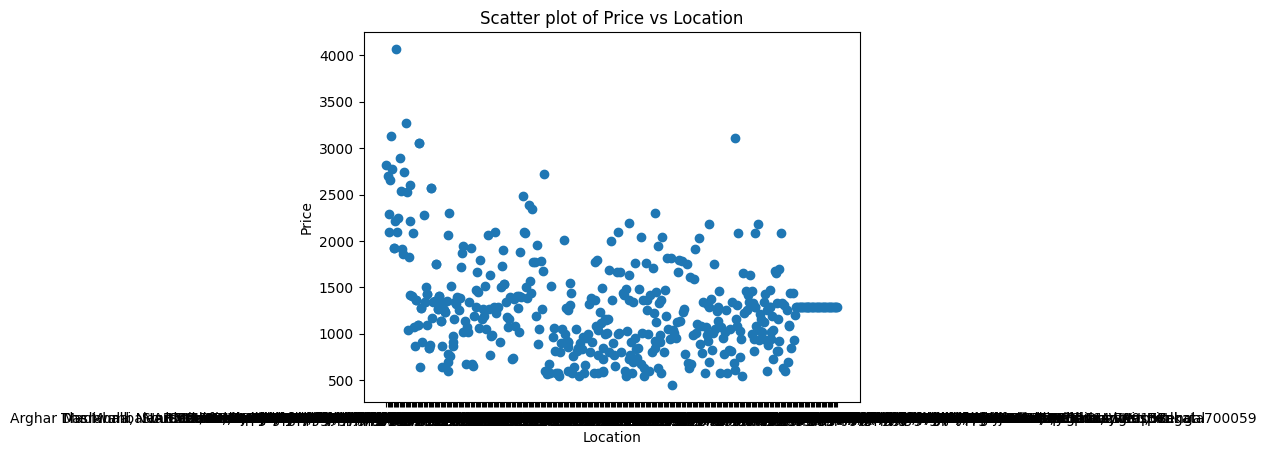

In [11]:
plt.scatter(df['Location'],df['Price'])
plt.xlabel('Location')
plt.ylabel('Price')
plt.title('Scatter plot of Price vs Location')
plt.show()

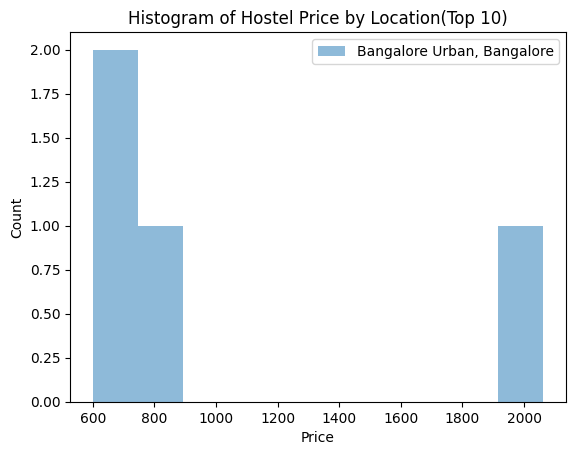

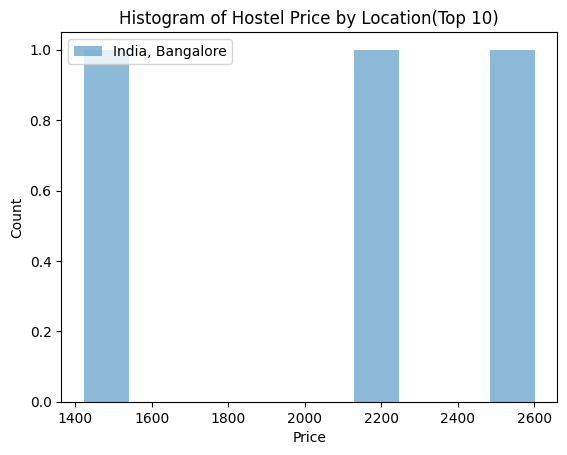

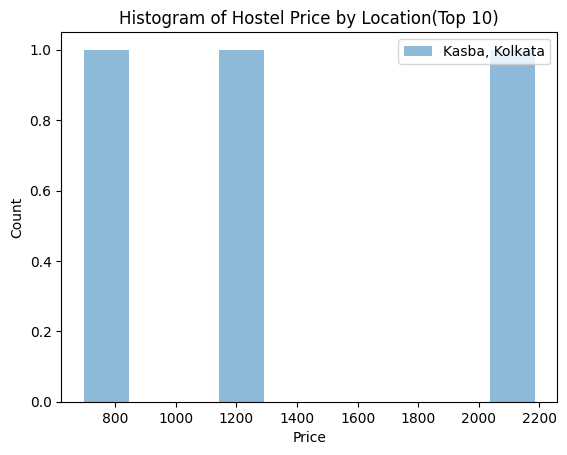

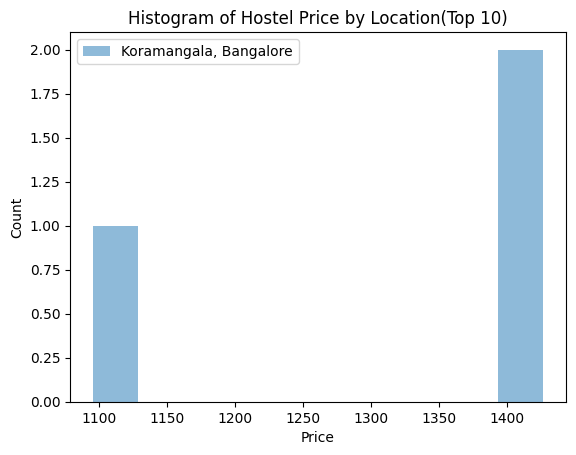

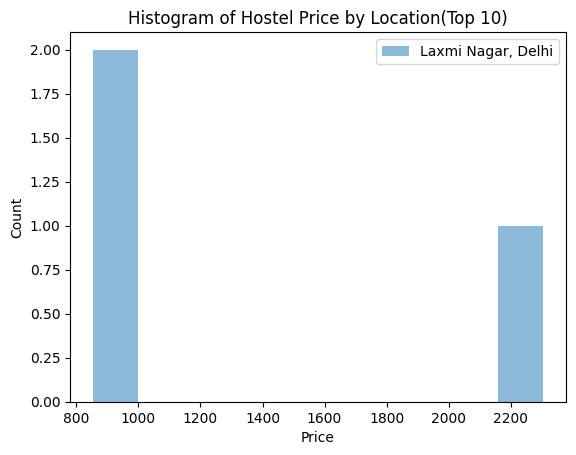

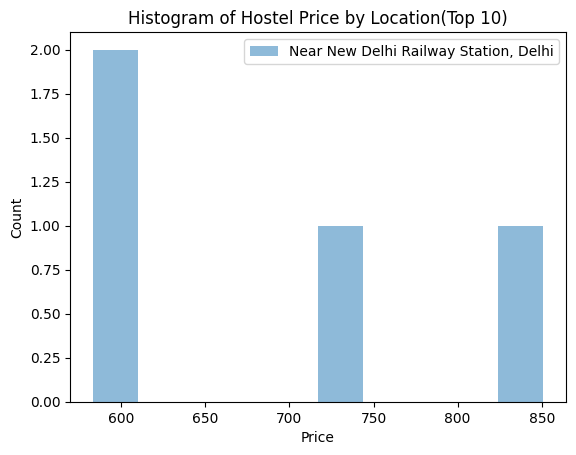

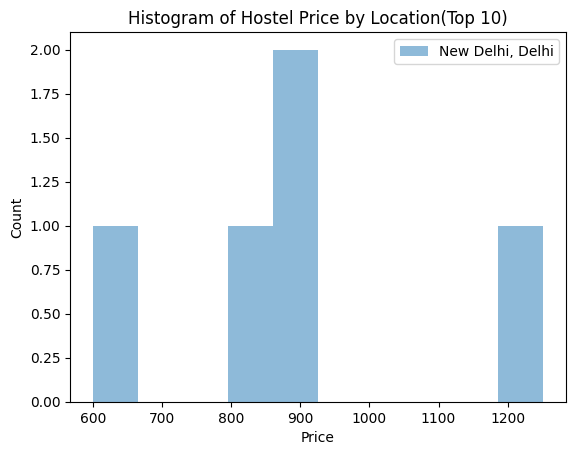

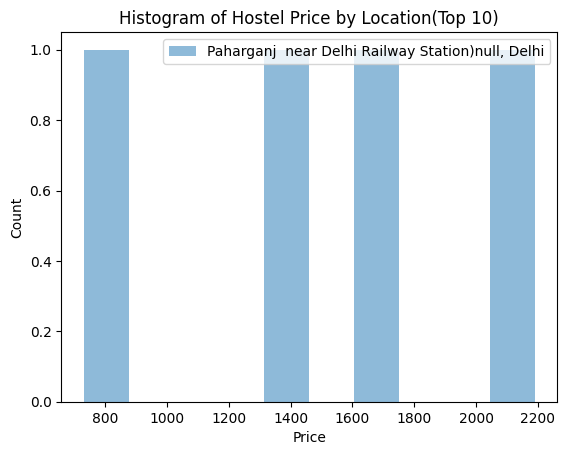

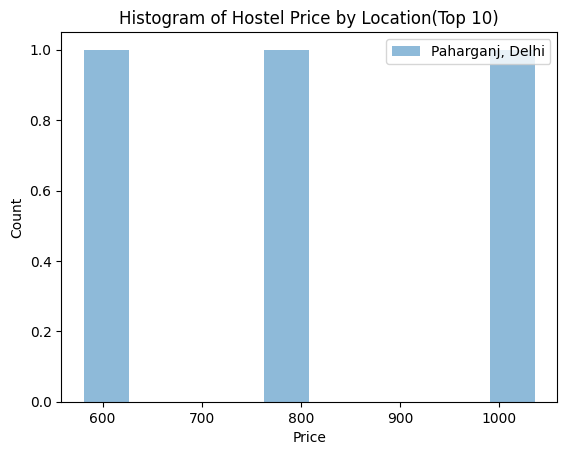

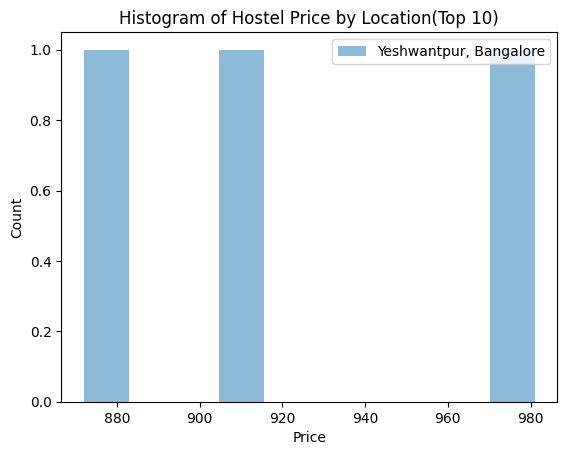

In [13]:
top_locations=df['Location'].value_counts().nlargest(10).index
grouped=df[df['Location'].isin(top_locations)].groupby('Location')
for name,group in grouped:
  plt.hist(group['Price'],alpha=0.5,label=name)
  plt.xlabel('Price')
  plt.ylabel('Count')
  plt.title('Histogram of Hostel Price by Location(Top 10)')
  plt.legend()
  plt.show()

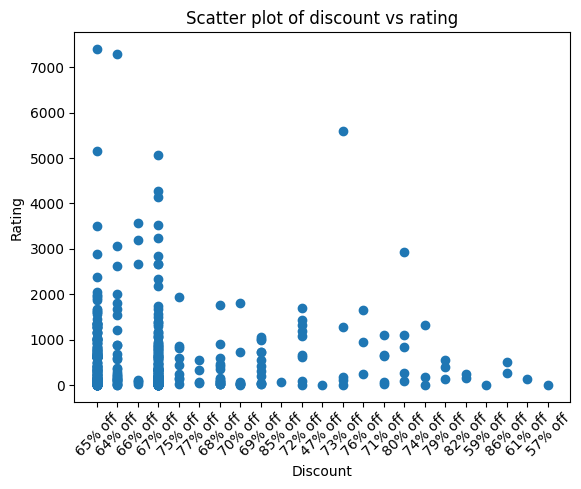

In [14]:
plt.scatter(df['Discount'],df['Rating'])
plt.xlabel('Discount')
plt.ylabel('Rating')
plt.title("Scatter plot of discount vs rating")
plt.xticks(rotation=45)
plt.show()

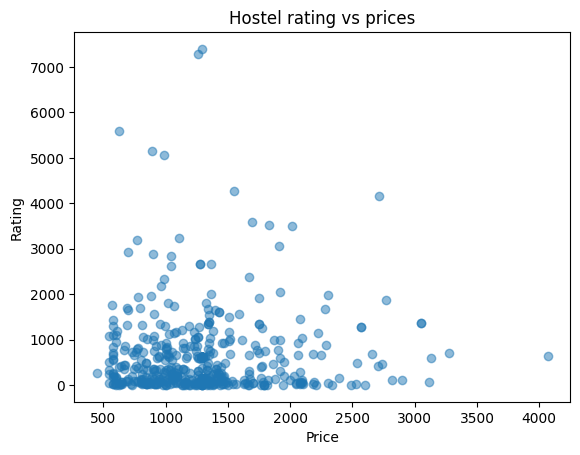

In [15]:
plt.plot(df['Price'],df['Rating'],'o',alpha=0.5)
plt.xlabel('Price')
plt.ylabel('Rating')
plt.title("Hostel rating vs prices")
plt.show()

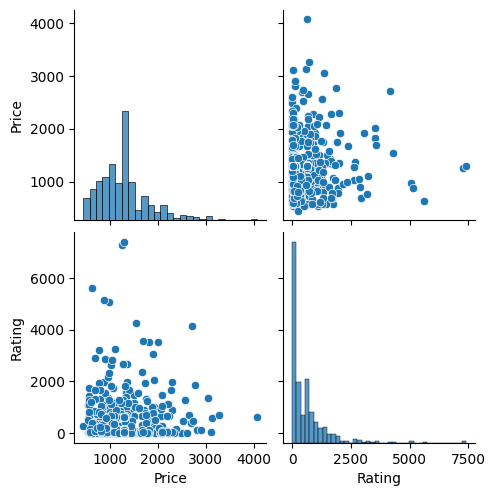

In [16]:
import seaborn as sns
cols=['Price','Discount','Rating']
data=df[cols]
sns.pairplot(data)
plt.show()

<ipython-input-17-75d6dd8bcee8>:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



<Axes: >

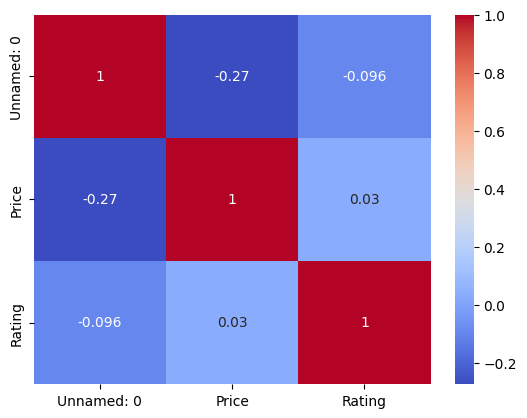

In [17]:
corr_matrix=df.corr()
sns.heatmap(corr_matrix,cmap='coolwarm',annot=True)

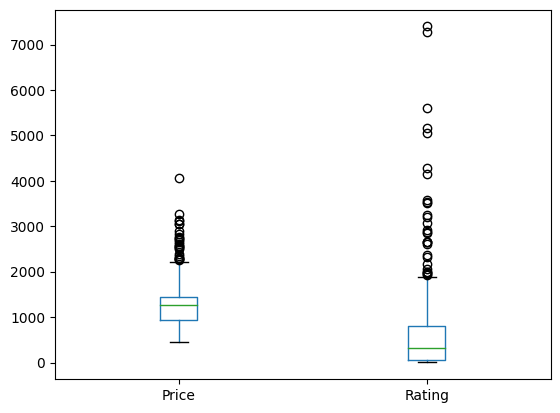

In [18]:
df.boxplot(column=['Price','Rating'],grid=False)
plt.show()

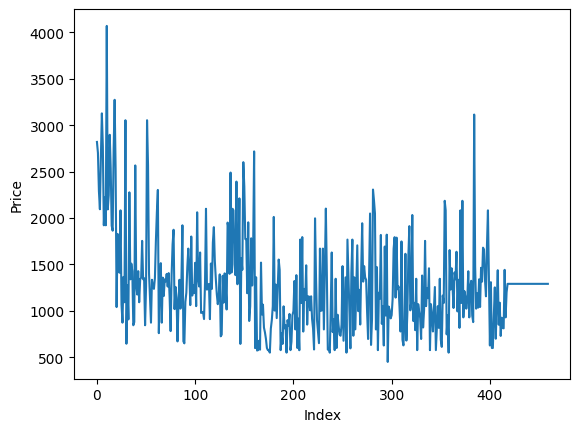

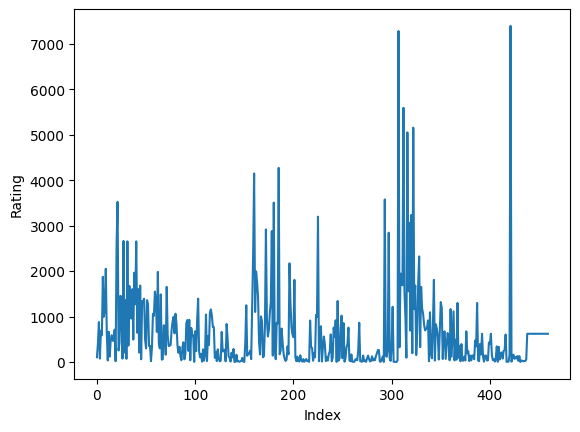

In [19]:
plt.plot(df['Price'])
plt.xlabel('Index')
plt.ylabel('Price')
plt.show()

plt.plot(df['Rating'])
plt.xlabel('Index')
plt.ylabel('Rating')
plt.show()

In [20]:
df

,Unnamed: 0,Hotel_name,Location,Price,Discount,Rating
0,0,Capital O 80951 Hotel Radisson Suite,"India, Mumbai",2819.000000,65% off,104.000000
1,1,OYO SilverKey Hotel Manas Residency,"Chembur East, Mumbai",2702.000000,65% off,410.000000
2,2,OYO Hotel Airport Metro Near Chhatrapati Shiva...,"Andheri East, Mumbai",2289.000000,64% off,879.000000
3,3,Collection O Hotel Kiwi International Near Chh...,"Andheri East, Mumbai",2094.000000,66% off,75.000000
4,4,OYO Druv's Taj Palace Near Chhatrapati Shivaji...,"Near Asalpha Metro Station, Dhumai Estate, Mumbai",2656.000000,65% off,686.000000
...,...,...,...,...,...,...
455,455,Flagship New Silver Inn,"Near Tagore Park, Tijala, Kolkata",1290.191388,65% off,620.636986
456,456,Flagship Tinker Bell Near Acropolis Mall,"Mukundapur, Kolkata",1290.191388,65% off,620.636986
457,457,OYO Flagship Hotel Suleman Palace Near St. Tho...,"Bux Lane, Kolkata",1290.191388,65% off,620.636986
458,458,Flagship Rakhakali Guest House Fooding And Loding,"near Shalimar station ticket counter , Kolkata",1290.191388,65% off,620.636986
